This code is taken from https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=26

In [11]:
# import packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
class BasicNN(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad = False)

    def forward(self,input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output 

In [34]:
# create dummy input
input_doses = torch.linspace(start = 0, end = 1, steps = 11)

# create model from class
model = BasicNN()
output_values = model(input_doses)

[Text(0.5, 0, 'Dose'), Text(0, 0.5, 'Effectiveness')]

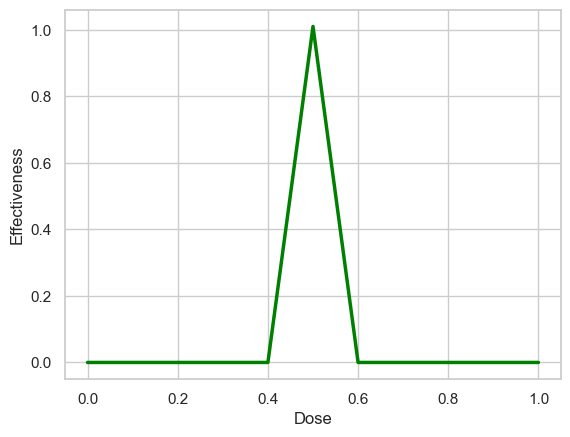

In [54]:
# plot results
sns.set(style = "whitegrid")
plt = sns.lineplot(x = input_doses, y = output_values, color = 'green', linewidth = 2.5)

plt.set(xlabel='Dose', ylabel="Effectiveness")

In [78]:
class BasicNN_train(nn.Module):
    def __init__(self):
        
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad = True)

    def forward(self,input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output 

In [80]:
# create new input doses
inputs = torch.tensor([0., 0.5, 1.])

# create output effectiveness
labels = torch.tensor([0.,1.,0.])

# create training model
model = BasicNN_train()
output_values = model(input_doses)

In [82]:
# create optimizer for NN
optimizer = SGD(model.parameters(), lr = 0.1)

# check the current value of the final bias
print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
            input_i = inputs[iteration]
            label_i = labels[iteration]

            output_i = model(input_i)

            loss = (output_i - label_i)**2

            loss.backward()

            total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num steps:" + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + ", Final bias: " + str(model.final_bias.data) + "\n")

print("Final bias, after optimization: " + str(model.final_bias.data))

Final bias, before optimization: tensor(0.)

Step: 0, Final bias: tensor(-3.2020)

Step: 1, Final bias: tensor(-5.7636)

Step: 2, Final bias: tensor(-7.8129)

Step: 3, Final bias: tensor(-9.4523)

Step: 4, Final bias: tensor(-10.7638)

Step: 5, Final bias: tensor(-11.8131)

Step: 6, Final bias: tensor(-12.6525)

Step: 7, Final bias: tensor(-13.3240)

Step: 8, Final bias: tensor(-13.8612)

Step: 9, Final bias: tensor(-14.2909)

Step: 10, Final bias: tensor(-14.6348)

Step: 11, Final bias: tensor(-14.9098)

Step: 12, Final bias: tensor(-15.1298)

Step: 13, Final bias: tensor(-15.3059)

Step: 14, Final bias: tensor(-15.4467)

Step: 15, Final bias: tensor(-15.5594)

Step: 16, Final bias: tensor(-15.6495)

Step: 17, Final bias: tensor(-15.7216)

Step: 18, Final bias: tensor(-15.7793)

Step: 19, Final bias: tensor(-15.8254)

Step: 20, Final bias: tensor(-15.8623)

Step: 21, Final bias: tensor(-15.8919)

Step: 22, Final bias: tensor(-15.9155)

Step: 23, Final bias: tensor(-15.9344)

Step: 24,

[Text(0.5, 0, 'Dose'), Text(0, 0.5, 'Effectiveness')]

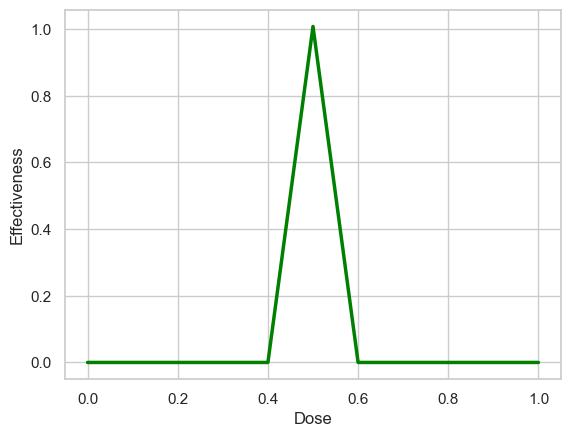

In [90]:
output_values = model(input_doses)

# plot results
sns.set(style = "whitegrid")
plt = sns.lineplot(x = input_doses, y = output_values.detach(), color = 'green', linewidth = 2.5)

plt.set(xlabel='Dose', ylabel="Effectiveness")